In [ ]:
import matplotlib.pyplot as plt
import pickle

with open('', 'rb') as f:
    data = pickle.load(f)
data

{0: {'train_acc': 0.399625,
  'train_t': 37.115952491760254,
  'train_avg_loss': 1.4889904260635376,
  'val_acc': 0.41375,
  'val_t': 0.8676049709320068,
  'val_avg_loss': 1.4719529151916504,
  'val2_acc': 0.04375,
  'val2_t': 0.7699718475341797,
  'val2_avg_loss': 1.8363287448883057},
 1: {'train_acc': 0.424125,
  'train_t': 23.189687490463257,
  'train_avg_loss': 1.4494242668151855,
  'val_acc': 0.44875,
  'val_t': 0.8944404125213623,
  'val_avg_loss': 1.4098412990570068,
  'val2_acc': 0.06,
  'val2_t': 0.7759861946105957,
  'val2_avg_loss': 1.9501097202301025},
 2: {'train_acc': 0.50125,
  'train_t': 19.579680681228638,
  'train_avg_loss': 1.1369799375534058,
  'val_acc': 0.53125,
  'val_t': 0.8799793720245361,
  'val_avg_loss': 0.9492988586425781,
  'val2_acc': 0.02125,
  'val2_t': 0.7900731563568115,
  'val2_avg_loss': 4.803284168243408},
 3: {'train_acc': 0.54225,
  'train_t': 19.80548930168152,
  'train_avg_loss': 0.941597580909729,
  'val_acc': 0.5575,
  'val_t': 0.849774360656

In [35]:
training_time = {k: data[k]['train_t'] for k in data}
training_accuracy = {k: data[k]['train_acc'] for k in data}
training_loss = {k: data[k]['train_avg_loss'] for k in data}
validation_time = {k: data[k]['val_t'] for k in data}
validation_accuracy = {k: data[k]['val_acc'] for k in data}
validation_loss = {k: data[k]['val_avg_loss'] for k in data}

In [36]:
average_train_time = sum(l := [x for _, x in training_time.items() if x < 200])/len(l)
average_train_time

20.377765520198924

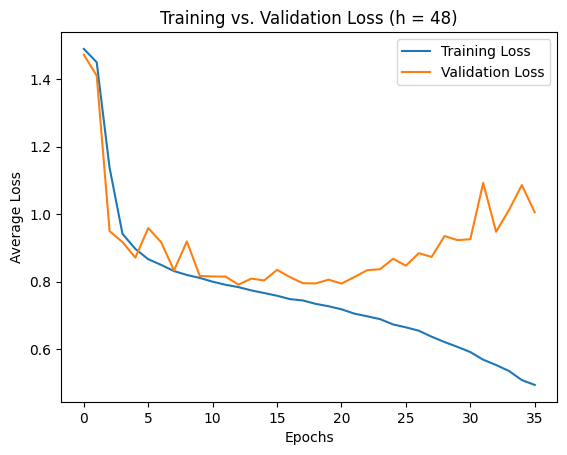

In [39]:
x = range(36)
y = [training_loss[p] for p in x]
z = [validation_loss[p] for p in x]

plt.title(f'Training vs. Validation Loss (h = 48)')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.plot(x, y, label='Training Loss')
plt.plot(x, z, label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

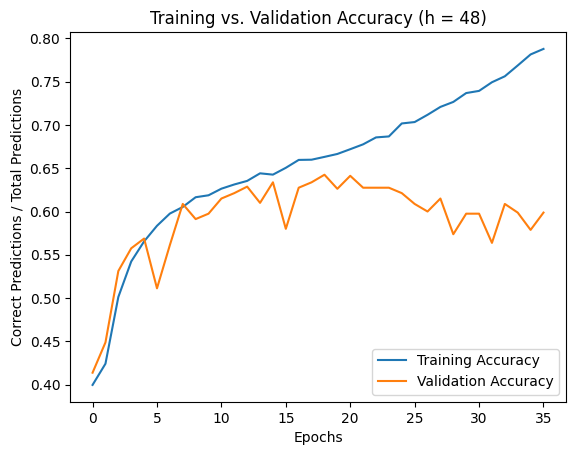

In [40]:
x = range(36)
y = [training_accuracy[p] for p in x]
z = [validation_accuracy[p] for p in x]

plt.title('Training vs. Validation Accuracy (h = 48)')
plt.xlabel('Epochs')
plt.ylabel('Correct Predictions / Total Predictions')
plt.plot(x, y, label='Training Accuracy')
plt.plot(x, z, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [50]:
def get(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    training_time = {k: data[k]['train_t'] for k in data}
    training_accuracy = {k: data[k]['train_acc'] for k in data}
    try:
        training_loss = {k: data[k]['train_avg_loss'] for k in data}
    except:
        training_loss = {k: data[k]['train_loss'] for k in data}
    validation_time = {k: data[k]['val_t'] for k in data}
    validation_accuracy = {k: data[k]['val_acc'] for k in data}
    try:
        validation_loss = {k: data[k]['val_avg_loss'] for k in data}
    except:
        validation_loss = {k: data[k]['val_loss'] for k in data}

    average_train_time = sum(l := [x for _, x in training_time.items() if x < 200])/len(l)

    x = range(36)
    tl = [training_loss[p] for p in x]
    vl = [validation_loss[p] for p in x]
    ta = [training_accuracy[p] for p in x]
    va = [validation_accuracy[p] for p in x]

    return x, tl, vl, ta, va

In [44]:
import json

def load_data(train_data, val_data, val2_data):
    with open(train_data) as training_f:
        training = json.load(training_f)
    with open(val_data) as valid_f:
        validation = json.load(valid_f)
    if val2_data:
        with open(val2_data) as valid2_f:
            validation2 = json.load(valid2_f)

    tra = []
    val = []
    val2 = []
    for elt in training:
        tra.append((elt["text"].split(),int(elt["stars"]-1)))
    for elt in validation:
        val.append((elt["text"].split(),int(elt["stars"]-1)))
    if val2_data:
        for elt in validation2:
            val2.append((elt["text"].split(),int(elt["stars"]-1)))
    return tra, val, val2

tr, v, te = load_data('training.json', 'validation.json', 'test.json')
tr_stars = [y for x, y in tr]
tr_star_counts ={x: tr_stars.count(x) for x in set(tr_stars)}
v_stars = [y for x, y in v]
v_star_counts ={x: v_stars.count(x) for x in set(v_stars)}
te_stars = [y for x, y in te]
te_star_counts ={x: te_stars.count(x) for x in set(te_stars)}

print(tr_star_counts, v_star_counts, te_star_counts)

{0: 3200, 1: 3200, 2: 1600} {0: 320, 1: 320, 2: 160} {2: 160, 3: 320, 4: 320}


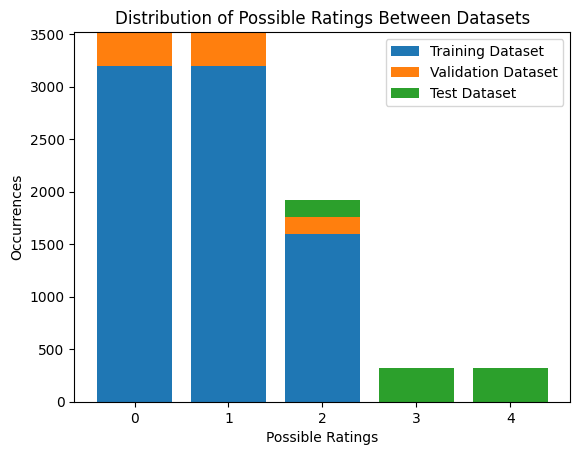

In [47]:
import numpy as np

categories = [0, 1, 2, 3, 4]
tr_values = np.array([0, 0, 0, 0, 0])
for i in tr_star_counts:
    tr_values[i] = tr_star_counts[i]
v_values = np.array([0, 0, 0, 0, 0])
for i in v_star_counts:
    v_values[i] = v_star_counts[i]
te_values = np.array([0, 0, 0, 0, 0])
for i in te_star_counts:
    te_values[i] = te_star_counts[i]

# Create the bar chart
fig, ax = plt.subplots()

ax.bar(categories, tr_values, label='Training Dataset')
ax.bar(categories, v_values, bottom=tr_values, label='Validation Dataset')
ax.bar(categories, te_values, bottom=tr_values+v_values, label='Test Dataset')

# Add labels and title
ax.set_xlabel('Possible Ratings')
ax.set_ylabel('Occurrences')
ax.set_title('Distribution of Possible Ratings Between Datasets')

# Add legend
ax.legend()

# Show the chart
plt.show()

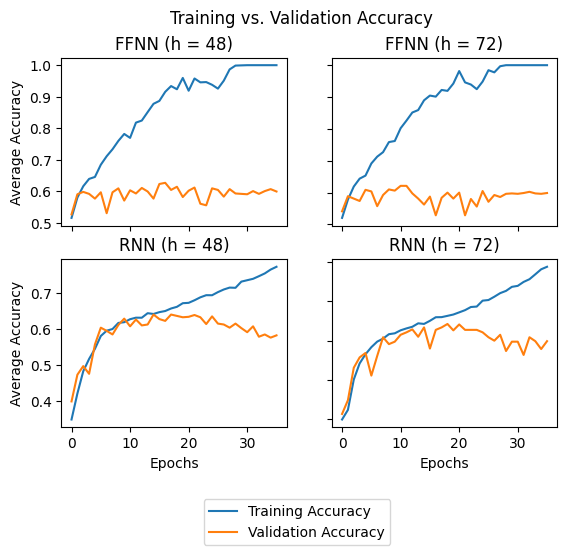

In [59]:
x1, tl1, vl1, ta1, va1 = get('ffnn_last_model_results_h48_e36.pkl')
x2, tl2, vl2, ta2, va2 = get('ffnn_last_model_results_h72_e36.pkl')
x3, tl3, vl3, ta3, va3 = get('rnn_training_results_h48.pkl')
x4, tl4, vl4, ta4, va4 = get('rnn_training_results_h72.pkl')

fig, axs = plt.subplots(2, 2)
fig.suptitle('Training vs. Validation Accuracy')
axs[0, 0].set_title('FFNN (h = 48)')
#axs[0, 0].xlabel('Epochs')
#axs[0, 0].ylabel('Correct Predictions / Total Predictions')
axs[0, 0].plot(x1, ta1, label='Training Accuracy')
axs[0, 0].plot(x1, va1, label='Validation Accuracy')
#axs[0, 0].legend(loc='lower right')
axs[0, 1].set_title('FFNN (h = 72)')
#axs[0, 0].xlabel('Epochs')
#axs[0, 0].ylabel('Correct Predictions / Total Predictions')
axs[0, 1].plot(x2, ta2, label='Training Accuracy')
axs[0, 1].plot(x2, va2, label='Validation Accuracy')
#axs[0, 1].legend(loc='lower right')
axs[1, 0].set_title('RNN (h = 48)')
#axs[0, 0].xlabel('Epochs')
#axs[0, 0].ylabel('Correct Predictions / Total Predictions')
axs[1, 0].plot(x3, ta3, label='Training Accuracy')
axs[1, 0].plot(x3, va3, label='Validation Accuracy')
#axs[1, 0].legend(loc='lower right')
axs[1, 1].set_title('RNN (h = 72)')
#axs[0, 0].xlabel('Epochs')
#axs[0, 0].ylabel('Correct Predictions / Total Predictions')
axs[1, 1].plot(x4, ta4, label='Training Accuracy')
axs[1, 1].plot(x4, va4, label='Validation Accuracy')
#axs[1, 1].legend(loc='lower right')

for ax in axs.flat:
    ax.set(xlabel='Epochs', ylabel='Average Accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.65, -0.15))

plt.show()

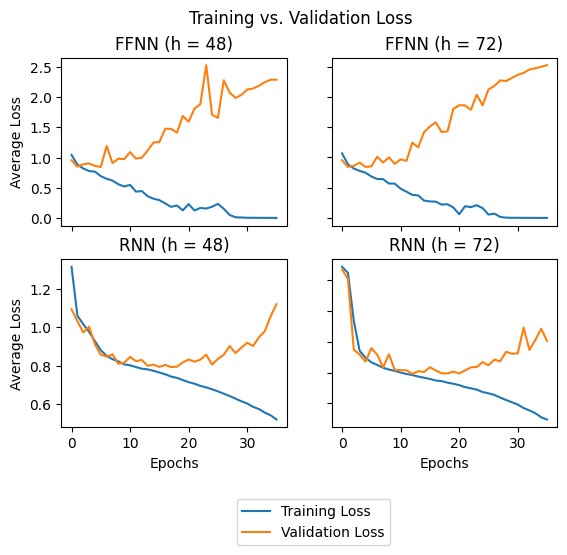

In [60]:
x1, tl1, vl1, ta1, va1 = get('ffnn_last_model_results_h48_e36.pkl')
x2, tl2, vl2, ta2, va2 = get('ffnn_last_model_results_h72_e36.pkl')
x3, tl3, vl3, ta3, va3 = get('rnn_training_results_h48.pkl')
x4, tl4, vl4, ta4, va4 = get('rnn_training_results_h72.pkl')

fig, axs = plt.subplots(2, 2)
fig.suptitle('Training vs. Validation Loss')
axs[0, 0].set_title('FFNN (h = 48)')
#axs[0, 0].xlabel('Epochs')
#axs[0, 0].ylabel('Correct Predictions / Total Predictions')
axs[0, 0].plot(x1, tl1, label='Training Loss')
axs[0, 0].plot(x1, vl1, label='Validation Loss')
#axs[0, 0].legend(loc='lower right')
axs[0, 1].set_title('FFNN (h = 72)')
#axs[0, 0].xlabel('Epochs')
#axs[0, 0].ylabel('Correct Predictions / Total Predictions')
axs[0, 1].plot(x2, tl2, label='Training Loss')
axs[0, 1].plot(x2, vl2, label='Validation Loss')
#axs[0, 1].legend(loc='lower right')
axs[1, 0].set_title('RNN (h = 48)')
#axs[0, 0].xlabel('Epochs')
#axs[0, 0].ylabel('Correct Predictions / Total Predictions')
axs[1, 0].plot(x3, tl3, label='Training Loss')
axs[1, 0].plot(x3, vl3, label='Validation Loss')
#axs[1, 0].legend(loc='lower right')
axs[1, 1].set_title('RNN (h = 72)')
#axs[0, 0].xlabel('Epochs')
#axs[0, 0].ylabel('Correct Predictions / Total Predictions')
axs[1, 1].plot(x4, tl4, label='Training Loss')
axs[1, 1].plot(x4, vl4, label='Validation Loss')
#axs[1, 1].legend(loc='lower right')

for ax in axs.flat:
    ax.set(xlabel='Epochs', ylabel='Average Loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.65, -0.15))

plt.show()